# Group3 -- Final Project 
# What Heart Disease Dataset Can Tell Us?
# Group Members:
- Tianqi Chen
- Yunya Gu
- Lucy Chang
- Yuzhang Zhu

# Basic information
- Name of the dataset: heart diease
- Founded on Kaggle, and it is originally from UCI.
- URL: https://www.kaggle.com/ronitf/heart-disease-uci 
- License:  Open Access 
- Open Access is free of charge, most copyright and      licensing restrctions. "It permits any users to read, download, copy, distribute, print, search, or link to the full texts of these articles, crawl them for indexing, pass them as data to software, or use them for any other lawful purpose."
  Reference:http://legacy.earlham.edu/~peters/fos/overview.htm
- Source: 
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert         Detrano, M.D., Ph.D. 
- This dataset includes 14 attributes and 303 instances.

# About Attributes
      - 1. age:  age in years      
      - 2. sex:  (1 = male; 0 = female)     
      - 3. cp:  chest pain type
          -- Value 1: typical angina
          -- Value 2: atypical angina
          -- Value 3: non-anginal pain
          -- Value 4: asymptomatic    
      - 4. trestbps:  resting blood pressure (in mm Hg on admission to the 
        hospital)
      
      - 5. chol:  serum cholestoral in mg/dl      
      - 6. fbs:  (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
      - 7. restecg:  resting electrocardiographic results
          -- Value 0: normal
          -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                  elevation or depression of > 0.05 mV)
          -- Value 2: showing probable or definite left ventricular hypertrophy
                  by Estes' criteria    
      - 8. thalach:  maximum heart rate achieved
      - 9. exang:  exercise induced angina (1 = yes; 0 = no)      
      - 10. oldpeak:  ST depression induced by exercise relative to rest   
      - 11. slope:  the slope of the peak exercise ST segment
          -- Value 1: upsloping
          -- Value 2: flat
          -- Value 3: downsloping      
      - 12. ca:  number of major vessels (0-3) colored by flourosopy       
      - 13. thal:  3 = normal; 6 = fixed defect; 7 = reversable defect  
      - 14. num:  (Prediction of haveing cardiovascular events or not)
      - Reference: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import pandas as pd
import bqplot
from bqplot import *
import numpy as np
import traitlets
import ipywidgets
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [10]:
heart = pd.read_csv("heart.csv")

# Purpose: 
Heart disease dataset includes 14 attributes and 303 instances. From these attributes, different situations of physiological factors are demonstrated. According to these factors, we are trying to find a possible relationship between certain attribute and the prediction of having
cardiovascular disease. Therefore, after our analysis, we could know that which attribute has the largest impact on heart health so that we could get some conclusion on how to avoid heart
health disease to some degree. 


# The influence on heart disease from a board view
 - Resting blood pressure VS Age

# Resting blood pressure VS Age
This scatter plot is used to show the relationship between resting blood pressure and age. The orange point means people who have a cardiovascular event. And the green point means people who do not have a cardiovascular event. We cut the figure into two parts and 50-year-old as the threshold. We could find that people under 50 years old with high resting blood pressure, it will have more opportunity to have cardiovascular events than people who are over 50 years old with high resting blood pressure.


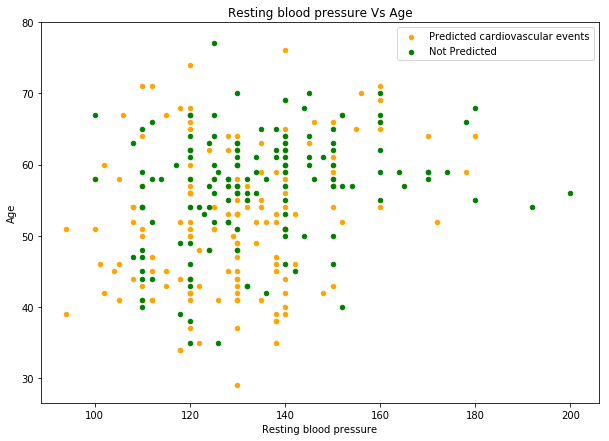

In [4]:
fig = heart[heart.target == 1].plot(kind = 'scatter',x = 'trestbps', y = 'age',color = 'orange',label = 'Predicted cardiovascular events')
heart[heart.target == 0].plot(kind = 'scatter',x = 'trestbps', y = 'age',color = 'green',label = 'Not Predicted',ax = fig)

fig.set_xlabel('Resting blood pressure')
fig.set_ylabel('Age')
fig.set_title('Resting blood pressure Vs Age')

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

# Distribution of several attributes on heart
This violin plot combines the box plot and density plot to show the distribution of several attributes on heart disease. We focus to analyze 4 attributes which are serum cholesterol, resting blood pressure, sex and maximum heart rate achieved. Except for the sex attribute figure, for all the other figure’s x-axis, 0 means people do not have a cardiovascular event, 1 means people have cardiovascular events. For the sex attribute figure, 0 means male and 1 means female. In addition, we could see that for each figure,  it has a black bar which indicates the quartile range used to read the data distribution more clearly and tell us which parts of data are the outlier. In addition, the width of the violin plot means the number of people. The greater the number of people is, the wider the width of the plot is.


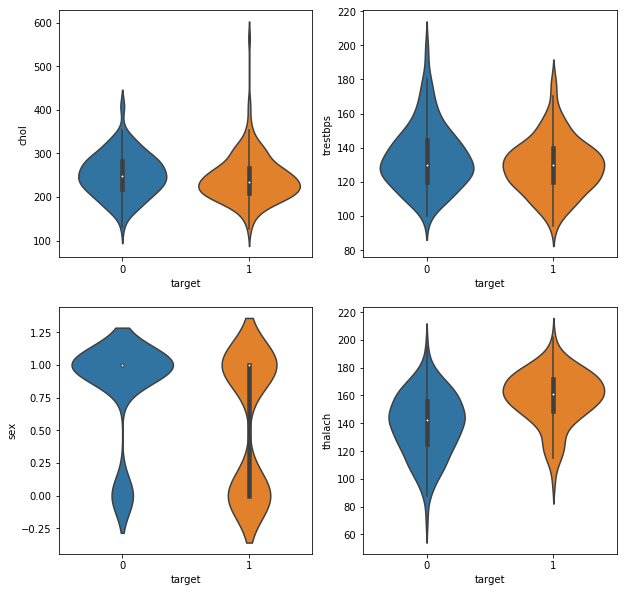

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='target', y = 'chol', data = heart)
plt.subplot(2,2,2)
sns.violinplot(x='target', y = 'trestbps', data = heart)
plt.subplot(2,2,3)
sns.violinplot(x='target', y = 'sex', data = heart)
plt.subplot(2,2,4)
sns.violinplot(x='target', y = 'thalach', data = heart)

# More exploration about Age & Resting blood pressure
In the “Age & Resting blood pressure” heatmap with scatter plot, instances with different age and Resting blood pressure level are shown in the heatmap. When the instance with a certain age and Resting blood pressure level is chosen, the number of people who have exercise-induced angina in this dataset is shown above. Additionally, the scatter plot, which is linked with the heatmap, demonstrates the maximum heart rate of this certain instance can achieve and the serum cholesterol level.
Age & Resting blood pressure=> Maximum heart achieved & Resting blood pressure
These visualizations focus on people who have exercise-induced angina in certain age and
Resting blood pressure level, while it also illustrates the relationship between the maximum heart
rate and Resting blood pressure to help understand their correlations to the heart disease.


In [6]:
nage = 41
ntrestbps = 49
hist2d, age_edges, trestbps_edges = np.histogram2d(heart['age'], 
                                                   heart['trestbps'], 
                                                   weights = heart['exang'],
                                                   normed = False,
                                                   bins = [nage,ntrestbps])
#age_centers = [(age_edges[i]+age_edges[i+1])*0.5 for i in range(len(age_edges)-1)]
#trestbps_centers = [(trestbps_edges[i]+trestbps_edges[i+1])*0.5 for i in range(len(trestbps_edges)-1)]
# Focusing on existing situations
hist2d[hist2d <= 0] = np.nan 

# Label 
mySelectedLabel = ipywidgets.Label()

def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = hist2d[i,j]
    mySelectedLabel.value = 'The number of people have exercise induced angina in this kind of condition = ' + str(v)
    trestbpss = [trestbps_edges[i], trestbps_edges[i+1]]
    ages = [age_edges[j],age_edges[j+1]]
    trestbps_mask = ( (heart['age'] >= ages[0]) & (heart['age']<= ages[1]) )
    thalach_scatt.x = heart['trestbps'][trestbps_mask]
    thalach_scatt.y = heart['thalach'][trestbps_mask]
    
# Scale    
col_sc = bqplot.ColorScale(scheme="RdYlBu",
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axises
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Serum cholestoral in mg/dl')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Age')

heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = age_edges,
                              #age_centers, 
                              column = trestbps_edges,
                              #trestbps_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'yellow'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 0.9})

heat_map.observe(get_data_value, 'selected')        
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

# scale for scatter plot
x_scl = bqplot.LinearScale() 
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Serum cholestoral level', scale=x_scl)
ax_ycl = bqplot.Axis(label='Maximum heart rate achieved', scale=y_scl, orientation='vertical', side='left')

i,j = 0,0
trestbpss = [trestbps_edges[i], trestbps_edges[i+1]]
ages = [age_edges[j],age_edges[j+1]]
trestbps_mask = ( (heart['age'] >= ages[0]) & (heart['age']<= ages[1]) &\
                (heart['trestbps'] >= trestbpss[0]) & (heart['trestbps'] <= trestbpss[1]))


# Line plot    Age - Maximum heart rate

#thalach, thalach_edges = np.histogram(heart['trestbps'][trestbps_mask],
#                                 weights = heart['thalach'][trestbps_mask],
#                                 bins = 10)
#thalach_centers = [(thalach_edges[i]+thalach_edges[i+1])*0.5 for i in range(len(thalach_edges)-1)]

#thalach_line = bqplot.Line(x = heart['oldpeak'][trestbps_mask],
#                           y = heart['thalach'][trestbps_mask], 
#                          scales={'x':x_scl, 'y':y_scl})

#fig_sqr = bqplot.Figure(marks = [thalach_line], axes = [ax_xcl, ax_ycl])

# Scatter plot
thalach_scatt = bqplot.Scatter(x = heart['trestbps'][trestbps_mask],
                               y = heart['thalach'][trestbps_mask], 
                              scales={'x':x_scl, 'y':y_scl})

fig_thal = bqplot.Figure(marks = [thalach_scatt], axes = [ax_xcl, ax_ycl])


    
heat_map.observe(get_data_value, 'selected')

ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig,fig_thal])])

# Explanation of Age & ST depression

In the “Age & ST depression” heatmap with scatter plot, instances with different age and ST depression level are shown in the heatmap. When the instance with certain age and ST depression level is chosen, the number of people who have exercise-induced angina in this dataset is shown above. Additionally, the scatter plot, which is linked with the heatmap, demonstrates the maximum heart rate of this certain instance can achieve and the serum cholesterol amount.
Age & ST depression=> Chol & ST depression
These visualizations focus on the relationship between serum cholesterol in mg/dl and ST depression which is induced by exercise relative to rest. This relationship helps to understand the correlations among exercise, rest, trace and heart disease.


In [7]:
nage = 41
ntrestbps = 49
hist2d, age_edges, oldpeak_edges = np.histogram2d(heart['age'], 
                                                   heart['oldpeak'], 
                                                   weights = heart['restecg'],
                                                   normed = False,
                                                   bins = [nage,ntrestbps])

hist2d[hist2d <= 0] = np.nan 

mySelectedLabel = ipywidgets.Label()

def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = hist2d[i,j]
    mySelectedLabel.value = 'The number of people have exercise induced angina in this kind of condition = ' + str(v)
    oldpeak2 = [oldpeak_edges[i], oldpeak_edges[i+1]]
    ages = [age_edges[j],age_edges[j+1]]
    oldpeak_mask = ( (heart['age'] >= ages[0]) & (heart['age']<= ages[1]) )
    chol_scatt.x = heart['oldpeak'][oldpeak_mask]
    chol_scatt.y = heart['chol'][oldpeak_mask]
    
# Scale    
col_sc = bqplot.ColorScale(scheme="PuBu",
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axises
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='ST depression induced by exercise relative to rest')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Age')

heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = age_edges,
                              #age_centers, 
                              column = oldpeak_edges,
                              #trestbps_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'yellow'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 0.9})

heat_map.observe(get_data_value, 'selected')        
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])




# scale for scatter plot
x_scl = bqplot.LinearScale() 
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='ST depression induced by exercise relative to rest', scale=x_scl)
ax_ycl = bqplot.Axis(label='Serum Cholesterol in mg/dl', scale=y_scl, orientation='vertical', side='left')

i,j = 0,0
oldpeaks = [oldpeak_edges[i], oldpeak_edges[i+1]]
ages = [age_edges[j],age_edges[j+1]]
oldpeak_mask = ( (heart['age'] >= ages[0]) & (heart['age']<= ages[1]) &\
                (heart['oldpeak'] >= oldpeaks[0]) & (heart['oldpeak'] <= oldpeaks[1]))



# Scatter plot
chol_scatt = bqplot.Scatter(x = heart['oldpeak'][oldpeak_mask],
                               y = heart['chol'][oldpeak_mask], 
                              scales={'x':x_scl, 'y':y_scl})

fig_thal = bqplot.Figure(marks = [chol_scatt], axes = [ax_xcl, ax_ycl])


    
heat_map.observe(get_data_value, 'selected')
ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig,fig_thal])])
# ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig])])

# If you are interested: Correlation of attributes

# Correlation of attributes:
This is a matrix figure to show the correlation value between each attribute. The deeper the color is, the larger the values of correlation are. Therefore, we could see that there are multiple groups like the maximum heart rate achieved and the slope of the peak exercise ST segment have a relatively large and positive correlation. Also, there are multiple groups like the age and the maximum heart rate achieved have a relatively large and negative correlation. 


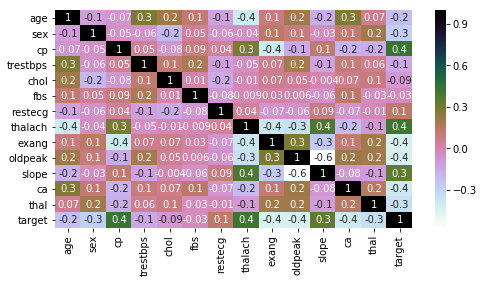

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(heart.corr(), annot=True,fmt='.1g', cmap='cubehelix_r') 
plt.rcParams['figure.dpi'] = 300
plt.show()

# Conclusion：
In this article, we mainly focus on doing analysis on the relationship among age, resting blood pressure, maximum heart rate and the ST depression induced by exercise relative to rest. The reason we mainly focus on analyzing these attribute is since their correlation value is higher than other groups.
According to our current analysis, we think that people who have are under 50 years old with high resting blood pressure may increase the opportunity to have cardiovascular events. In addition, people who are under 50 years old with high serum cholesterol level especially people who have exercise-induced angina, it has higher possibility to have cardiovascular events than others. Finally, we people who have a higher level of ST depression will have relatively high possible to have cardiovascular events than others.
Therefore, young people especially who have a high level of resting blood pressure,  serum cholesterol and ST depression should be more careful to supervise themselves in case of having cardiovascular events.
